In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import functools
import re

For this project, I used the Gapminder dataset. I limited the data for the recent 8 years (2015-2022). I choose three variables to analyze that I am interested in (child mortality(0-5 years old dying per 1000 new born), income, life_expectancy). 

In [15]:
"""Gatherng the different variables from three different CSV files"""
child_mortality=pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
income=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
life_expectancy=pd.read_csv('life_expectancy_years.csv')

In [16]:
"""Limiting the data for the last 8 years(2018-2022)"""
child_mortality=child_mortality[['country', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
income=income[['country', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
life_expectancy=life_expectancy[['country', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

In [17]:
"""This cell is first cell in the data wrangling process. Preparing the different dataframes for merging. 
The steps involved is reshaping and renaming of different variables."""
child_mortality=child_mortality.melt(id_vars=['country'])
child_mortality=child_mortality.rename(columns={'variable': 'year' , 'value': 'child_mortality'})
income=income.melt(id_vars=['country'])
income=income.rename(columns={'variable': 'year' , 'value': 'income'})
life_expectancy=life_expectancy.melt(id_vars=['country'])
life_expectancy=life_expectancy.rename(columns={'variable': 'year' , 'value': 'life_expectancy'})

In [18]:
"""Merging the three different dataframes into one dataframe."""
data_frames = [child_mortality, income, life_expectancy]
gapminder = functools.reduce(lambda  left,right: pd.merge(left,right,on=['country', 'year'], how='outer'), data_frames)

In [19]:
"""The income column is in a string format. Mainly because of the "K". In this cell, the k is removed and the number is 
multiplied by 1000."""
gapminder['check']=0
for i in range (len (gapminder['check'])):
    if (re.findall(r"k", str(gapminder['income'][i]))!=[]):
        gapminder['check'][i]=1
        gapminder['income'][i]=re.sub(r"k", "", gapminder['income'][i])
        gapminder['income'][i]=float(gapminder['income'][i])
        gapminder['income'][i]=gapminder['income'][i]*1000
    else:
        gapminder['income'][i]=float(gapminder['income'][i])
        
gapminder = gapminder.drop("check", axis=1)

C:\Users\Karim Gamal\Anaconda3\anacondnew\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Karim Gamal\Anaconda3\anacondnew\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Karim Gamal\Anaconda3\anacondnew\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Karim Gamal\Anacond

In [20]:
"""Assessing the data"""
print ("The number of rows and columns are: \n {} \n".format(gapminder.shape))
print ("The empty columns are \n {}: \n".format(gapminder.isnull().sum()))
print ("Number of duplicated rows are {} \n".format(gapminder.duplicated().sum()))
print ("The number of unique values in each column are: \n {}: \n".format(gapminder.nunique()))
print ("The unique values in the year's column is \n {}: \n".format(gapminder.year.unique()))     
print ("The datatypes of the different columns are \n {}: \n".format(gapminder.dtypes))
gapminder['income']=gapminder['income'].astype(float)
gapminder['year']=gapminder['year'].astype(float)

The number of rows and columns are: 
 (1576, 5) 

The empty columns are 
 country             0
year                0
child_mortality     0
income             16
life_expectancy    43
dtype: int64: 

Number of duplicated rows are 0 

The number of unique values in each column are: 
 country            197
year                 8
child_mortality    935
income             857
life_expectancy    292
dtype: int64: 

The unique values in the year's column is 
 ['2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']: 

The datatypes of the different columns are 
 country             object
year                object
child_mortality    float64
income              object
life_expectancy    float64
dtype: object: 



In [21]:
"""Dropping cells with null values"""
gapminder.dropna(inplace=True)
gapminder.isna().sum()

country            0
year               0
child_mortality    0
income             0
life_expectancy    0
dtype: int64

From the cell below, it is clear that the income column is right-skewed, which means that the majority of people make around 30000$ per year and only very few people go above 75000$ or 100000$ (Expected). Moreover, people on average make around 12500$ per year, and earning about 115000 make you in the top 10 percent. 

In [23]:
gapminder['income'].describe()

count      1533.000000
mean      19835.998043
std       20619.266317
min         673.000000
25%        4230.000000
50%       12500.000000
75%       28800.000000
max      115000.000000
Name: income, dtype: float64

Text(0.5, 1.0, 'Income Distrubtion')

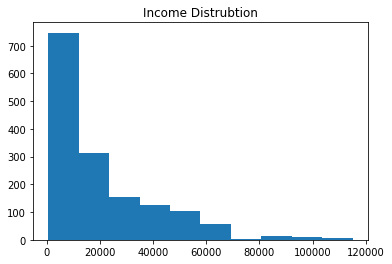

In [47]:
plt.hist(gapminder['income'])
plt.title('Income Distrubtion')

The observation is also valid for the right-skewed child_mortality. The graph shows that in the majority of the countries, the number of kids dying for every 1000 newborns is around 20 kids (the average is 16 kids), and there are only a few countries where this number can go beyond 100 and above.

In [24]:
gapminder['life_expectancy'].describe()

count    1533.000000
mean       72.627006
std         7.158892
min        48.500000
25%        67.200000
50%        73.600000
75%        77.800000
max        85.300000
Name: life_expectancy, dtype: float64

Text(0.5, 1.0, 'Life Expectancy Distrubtion')

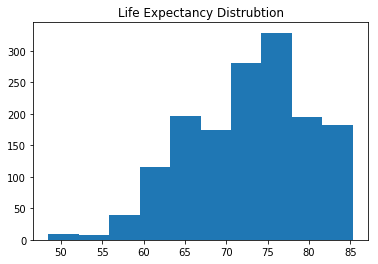

In [48]:
plt.hist(gapminder['life_expectancy'])
plt.title('Life Expectancy Distrubtion')

On the opposite side, the life expectancy graph is skewed steeply more to the negative side, and for the majority of countries, people tend to live for 60 years and more ( the average is 74).

In [25]:
gapminder['child_mortality'].describe()

count    1533.000000
mean       27.870965
std        28.424547
min         1.470000
25%         6.680000
50%        16.200000
75%        42.400000
max       133.000000
Name: child_mortality, dtype: float64

Text(0.5, 1.0, 'Child Mortality Distrubtion')

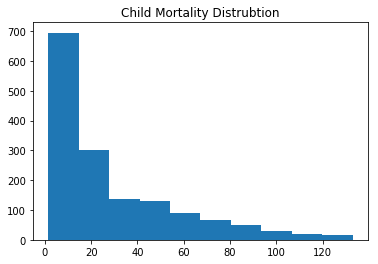

In [49]:
plt.hist(gapminder['child_mortality'])
plt.title('Child Mortality Distrubtion')

The analysis in the next cell is to see how income can affect the life expectancy rate. It is reasonable to think that income can affect how long people live, since it can affect the medical service they receive.

Text(0.5, 1.0, 'The effect of income on the life expectancy rate')

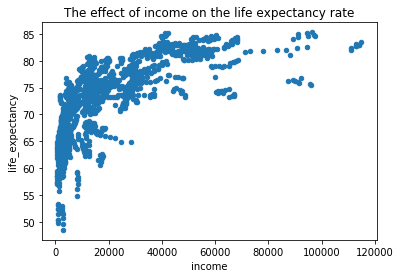

In [26]:
gapminder.plot(x='income', y='life_expectancy', kind='scatter')
plt.title("The effect of income on the life expectancy rate")

From the graph above, it is safely to conclude that the higher the income is the more people are likely to live longer. However, that earning above 40000$/year will not affect greatly how long you will live. The graph turn to almost a straight line after the 40000$/year and that people who earn 120000$/year live almost the same as people who earn 40000$/year.

The analysis in the next cell is to see how income can affect the child mortality rate. income can play important role on the death of kids between 0-5 yrs old., since it can affect the medical service they receive.

Text(0.5, 1.0, 'The effect of income on the child mortality rate')

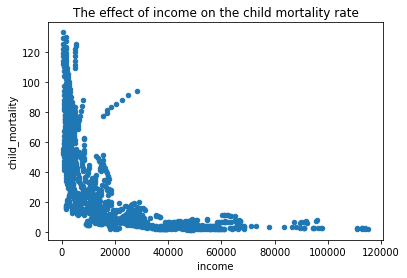

In [27]:
gapminder.plot(x='income', y='child_mortality', kind='scatter')
plt.title("The effect of income on the child mortality rate")

For the child_mortality, the number decreases sharply between income of (0-20000$/year). After that income isnot an imprtant factor in the child mortality rate(almost a straight line)

After finding out that income is a significant factor in the life expectancy and child mortality equation. It is relevant to look even deeper and to zoom in more into a certain part of the income and life expectancy/child mortality relationship. In the next part, data is divided into three parts (below-average income, above-average income, and high income). The high-income region is in the  75 percentile, the above-average is in the 50 percentile and the below-average is in the 25 percentile.

In [28]:
"""Dividing the dataframe according to the income factor. The data is divided into three parts. Above average, below average
and high income."""
gapminder['income'].describe()
bin_edges=[673.000000, 4277.500000, 12500.000000, 28950.000000, 115000.000000]
bin_names=['min', '25%', '50%', '75%']
gapminder['income_level']=pd.cut(gapminder['income'], bin_edges, labels=bin_names)
gapminder_high_income=gapminder.query('income_level=="75%"')
gapminder_above_average_income=gapminder.query('income_level=="50%"')
gapminder_below_average_income=gapminder.query('income_level=="25%" or income_level=="min"')

Text(0.5, 1.0, 'child mortality in the below average income class')

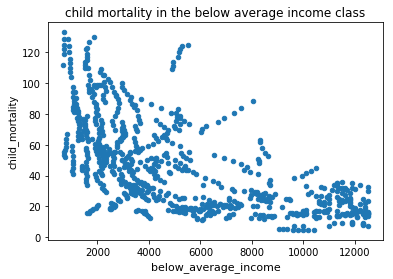

In [29]:
gapminder_below_average_income.plot(x='income', y='child_mortality', kind='scatter')
plt.xlabel('below_average_income', fontsize=11)
plt.title("child mortality in the below average income class")

Text(0.5, 1.0, 'child mortality in the above average income class')

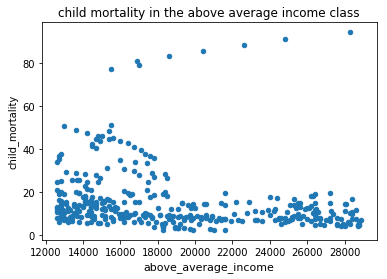

In [30]:
gapminder_above_average_income.plot(x='income', y='child_mortality', kind='scatter')
plt.xlabel('above_average_income', fontsize=11)
plt.title("child mortality in the above average income class")

Text(0.5, 1.0, 'child mortality in the high average income class')

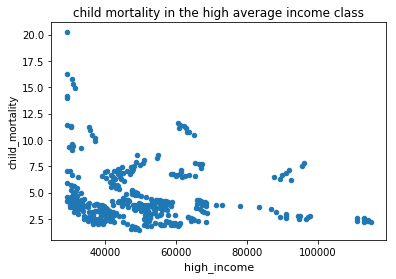

In [31]:
gapminder_high_income.plot(x='income', y='child_mortality', kind='scatter')
plt.xlabel('high_income', fontsize=11)
plt.title("child mortality in the high average income class")

From the three graphs below. A variation in the low income category can significantly affects the number of kids dying. However, moving to the above average and high income category the effect of income decreases. The higher the income, the lower is the effect.

Text(0.5, 1.0, 'life expectancy in the below average income class')

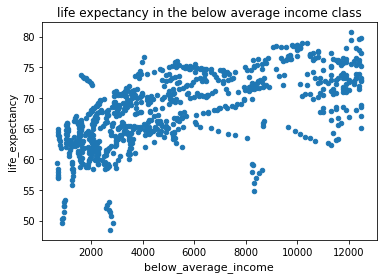

In [32]:
gapminder_below_average_income.plot(x='income', y='life_expectancy', kind='scatter')
plt.xlabel('below_average_income', fontsize=11)
plt.title("life expectancy in the below average income class")

Text(0.5, 1.0, 'life expectancy in the above average income class')

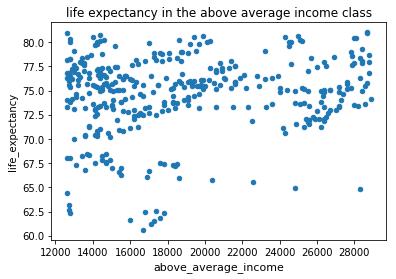

In [33]:
gapminder_above_average_income.plot(x='income', y='life_expectancy', kind='scatter')
plt.xlabel('above_average_income', fontsize=11)
plt.title("life expectancy in the above average income class")

Text(0.5, 1.0, 'life expectancy in the high income class')

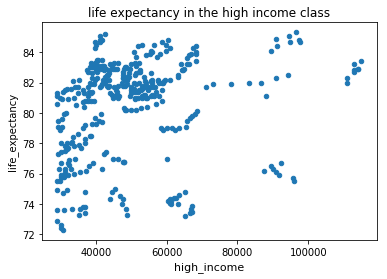

In [34]:
gapminder_high_income.plot(x='income', y='life_expectancy', kind='scatter')
plt.xlabel('high_income', fontsize=11)
plt.title("life expectancy in the high income class")

For the life expectancy case, the behaviour is the same as income. For the below average class a difference in their incomes can significantly affect how long they live. Moving to the upper classes income isnot an important factor in the life expectancy formula.

Since income plays an important role in the life expectancy and child mortality equations. It is important to see how income, life expectancy, and child mortality evolve.

Text(0.5, 1.0, 'The Evolution of The Average Worldwide Income')

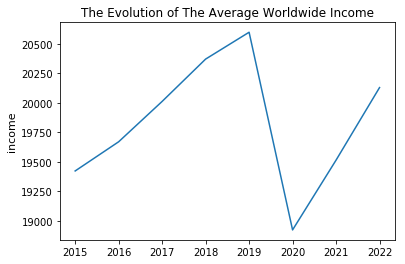

In [51]:
#gapminder.groupby('year')['income'].mean().plot(style='.')
plt.plot(gapminder.groupby('year')['income'].mean())
plt.ylabel('income', fontsize=11)
plt.title("The Evolution of The Average Worldwide Income")

From the graph above,it is clear that the average income increases yearly worldwide, except for a sudden drop happens in 2020, which is expected because of the world pandemic. However, 2021 shows significant increase and 2022 as well.

Text(0.5, 1.0, 'The Evolution of the Average Worldwide Life Expectancy Rate')

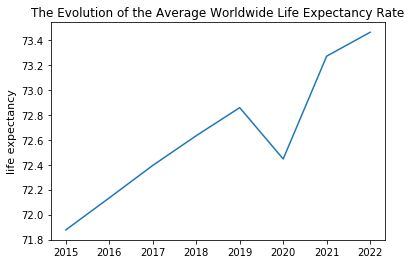

In [52]:
#gapminder.groupby('year')['life_expectancy'].mean().plot(style='.')
plt.plot(gapminder.groupby('year')['life_expectancy'].mean())
plt.ylabel('life expectancy', fontsize=11)
plt.title("The Evolution of the Average Worldwide Life Expectancy Rate")

From the graph above, moving forward each year people on average live longer, which can be due to improvment in the health systems. Again a big drop in 2020 because of the pandemic. Neverthless,fortunately, the graph goes up again for 2021 and 2022

Text(0.5, 1.0, 'The evolution of the average worldwide child mortality rate')

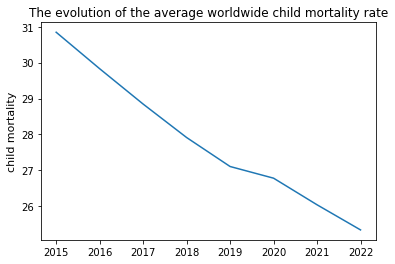

In [53]:
#gapminder.groupby('year')['child_mortality'].mean().plot(style='.')
plt.plot(gapminder.groupby('year')['child_mortality'].mean())
plt.ylabel('child mortality', fontsize=11)
plt.title("The evolution of the average worldwide child mortality rate")

Thankfully, less kids are dying as we move forward in time. The graph experience a linear relationship. 

Since income is an important factor since it can differ greatly between the developed and the developing countries. Therefore, it is important to analyze the evolution of income, and its effect on life expectancy and child mortality for the developed and developing countries separately.

In [38]:
"""This section is assuming the countries with income above the world wide average income is a developed countries. While,
countries with income below the world wide average are developing countries. The data is then seperated to developed and
undeveloped countries."""
def country_status(df):
    if (df['income']>gapminder['income'].mean()):
        return "developed"
    else:
        return "developing"

gapminder['country_status'] = gapminder.apply(country_status, axis = 1)

In [39]:
developing_data=gapminder.query('country_status=="developing"')
developed_data=gapminder.query('country_status=="developed"')
income_developing=developing_data.groupby('year')['income'].mean()
lifeexp_developing=developing_data.groupby('year')['life_expectancy'].mean()
childmort_developing=developing_data.groupby('year')['child_mortality'].mean()
income_developed=developed_data.groupby('year')['income'].mean()
lifeexp_developed=developed_data.groupby('year')['life_expectancy'].mean()
childmort_developed=developed_data.groupby('year')['child_mortality'].mean()

In [54]:
income_developing.describe()

count       8.000000
mean     7817.287039
std       118.263905
min      7705.720000
25%      7746.073718
50%      7759.421462
75%      7873.542308
max      8018.281250
Name: income, dtype: float64

Text(0.5, 1.0, 'Developing Countries Income Distrubtion')

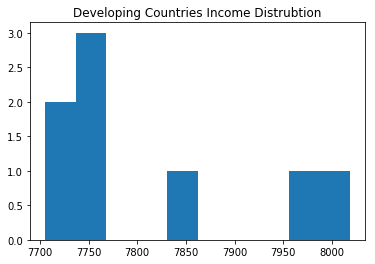

In [55]:
plt.hist(income_developing)
plt.title('Developing Countries Income Distrubtion')

Text(0.5, 1.0, 'The evolution of income in the developing countries')

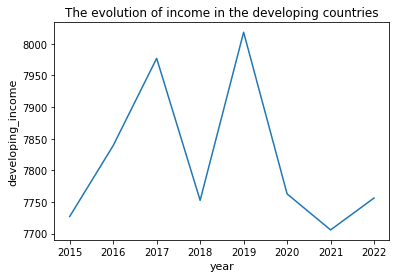

In [57]:
#plt.scatter(gapminder.year.unique(),income_developing)
plt.plot(income_developing)
plt.ylabel('developing_income', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.title("The evolution of income in the developing countries")

The graph above is representing the evolution of the income in the developing countries. Regardless of the the sudden, unexplained drop in 2018 point. The average household in a developing countries is making more money each year. The drop that started in 2020 and the years after is explainable by the worldwide pandemic.

The graph above is representing the evolution of income in developing countries. Regardless of the sudden, unexplained drop in 2018 point. The average household in developing countries is making more money each year. The drop that started in 2020 and the years after is explainable by the worldwide pandemic. On average people make around 7759$ per year, and the people who make relatively high income earn around 8018$ per year.

In [58]:
income_developed.describe()

count        8.000000
mean     43729.648144
std        581.742839
min      42816.923077
25%      43393.244147
50%      43635.825325
75%      44134.133089
max      44631.343284
Name: income, dtype: float64

Text(0.5, 1.0, 'Developed Countries Income Distrubtion')

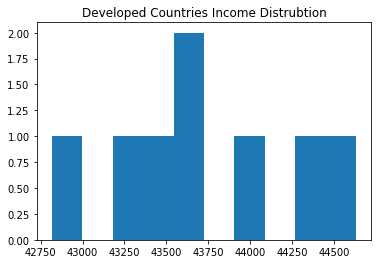

In [59]:
plt.hist(income_developed)
plt.title('Developed Countries Income Distrubtion')

In the case of the developed countries, the income behaves almost in the same way as the developing countries. Even so, the y-axis numbers are relatively higher than in the case of developing countries. In the developed countries, people on average make 43636$ per year, which is significantly higher than developing countries (7759$ per year) Moreover, the capability of the developed countries to recover from the pandemic negative effect appears to be much stronger, faster, and more efficient.

Text(0.5, 1.0, 'The evolution of income in the developed countries')

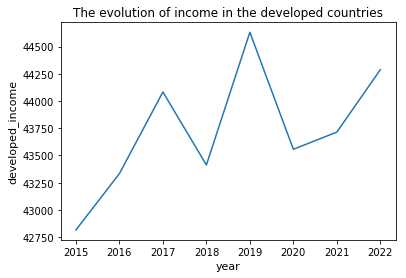

In [60]:
#plt.scatter(gapminder.year.unique(),income_developed)
plt.plot(income_developed)
plt.ylabel('developed_income', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.title("The Evolution of Income in The Developed Countries")

In [61]:
lifeexp_developing.describe()

count     8.000000
mean     69.365467
std       0.640388
min      68.437692
25%      68.998846
50%      69.331380
75%      69.704370
max      70.262602
Name: life_expectancy, dtype: float64

Text(0.5, 1.0, 'Developing Countries Life Expectancy Distrubtion')

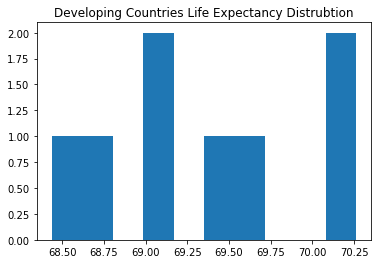

In [64]:
plt.hist(lifeexp_developing)
plt.title('Developing Countries Life Expectancy Distrubtion')

The life expectancy of the developing countries increases over time in a nearly linear way. Furthermore, the pandemic doesn't seem to strongly affect the life expectancy in developing countries as it was with the case of developed countries. people living in developing countries live about 70  years.

Text(0.5, 1.0, 'The Evolution of Life Expectancy Rate in the Developing Countries')

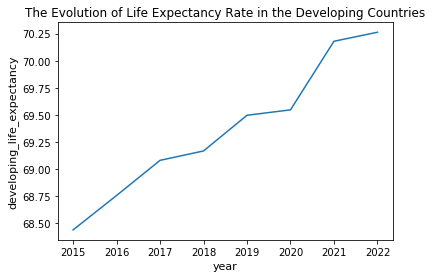

In [65]:
#plt.scatter(gapminder.year.unique(),lifeexp_developing)
plt.plot(lifeexp_developing)
plt.ylabel('developing_life_expectancy', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.title("The Evolution of Life Expectancy Rate in the Developing Countries")

In [66]:
lifeexp_developed.describe()

count     8.000000
mean     79.134546
std       0.359518
min      78.755385
25%      78.879715
50%      78.992698
75%      79.362087
max      79.711111
Name: life_expectancy, dtype: float64

Text(0.5, 1.0, 'Developed Countries Life Expectancy Distrubtion')

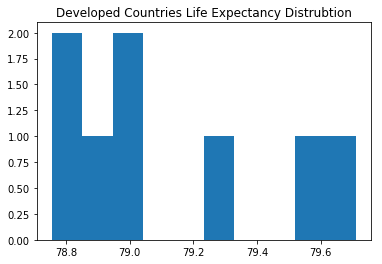

In [67]:
plt.hist(lifeexp_developed)
plt.title('Developed Countries Life Expectancy Distrubtion')

The developed countries also have a linear relationship between time and life expectancy. However, surprisingly, the pandemic did strongly affect how long the people live in the developed countries compared to the developing countries. Moreover, the average of how long people live in developed countries is much higher than in an undeveloped country (around 79 years)

Text(0.5, 1.0, 'The Evolution of Life Expectancy Rate in The Developed Countries')

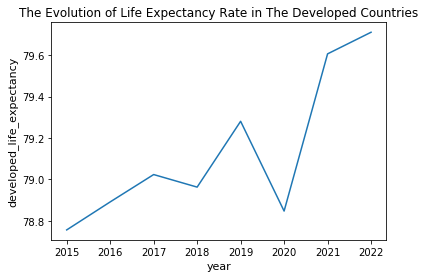

In [68]:
#plt.scatter(gapminder.year.unique(),lifeexp_developed)
plt.plot(lifeexp_developed)
plt.ylabel('developed_life_expectancy', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.title("The Evolution of Life Expectancy Rate in The Developed Countries")

In [69]:
childmort_developing.describe()

count     8.000000
mean     38.624818
std       2.411812
min      35.644065
25%      36.422174
50%      38.835681
75%      39.993481
max      42.348000
Name: child_mortality, dtype: float64

Text(0.5, 1.0, 'Developing Countries Child Mortality Distrubtion')

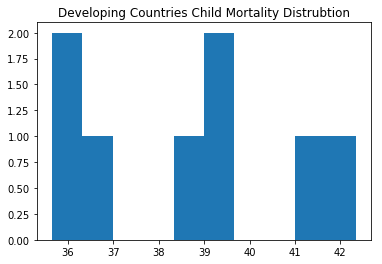

In [70]:
plt.hist(childmort_developing)
plt.title('Developing Countries Child Mortality Distrubtion')

Text(0.5, 1.0, 'The evolution of child mortality rate in the developing countries')

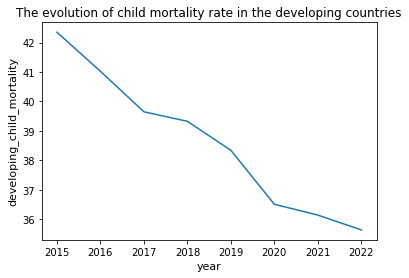

In [71]:
#plt.scatter(gapminder.year.unique(),childmort_developing)
plt.plot(childmort_developing)
plt.ylabel('developing_child_mortality', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.title("The evolution of child mortality rate in the developing countries")

In [72]:
childmort_developed.describe()

count    8.000000
mean     6.390484
std      1.106131
min      5.234444
25%      5.331031
50%      6.359982
75%      7.290077
max      7.838923
Name: child_mortality, dtype: float64

Text(0.5, 1.0, 'Developed Countries Child Mortality Distrubtion')

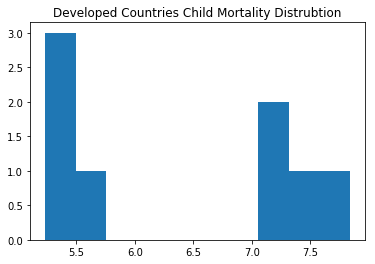

In [73]:
plt.hist(childmort_developed)
plt.title('Developed Countries Child Mortality Distrubtion')

Text(0.5, 1.0, 'The Evolution of Child Mortality Rate in The Developed Countries')

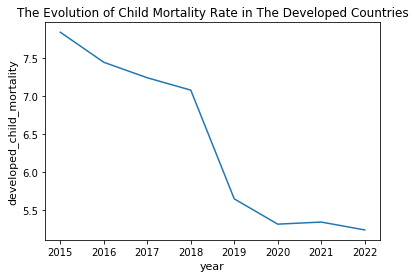

In [75]:
#plt.scatter(gapminder.year.unique(),childmort_developed)
plt.plot(childmort_developed)
plt.ylabel('developed_child_mortality', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.title("The Evolution of Child Mortality Rate in The Developed Countries")

In the case of child mortality, both developed and developing countries are improving over time. However, the number of the child dying in developed countries is much less than in developing countries. The numbers of kids dying per 1000 newborns in the developing and developed countries are 39, 6 respectively. 